In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('train.csv')

# Analysis

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


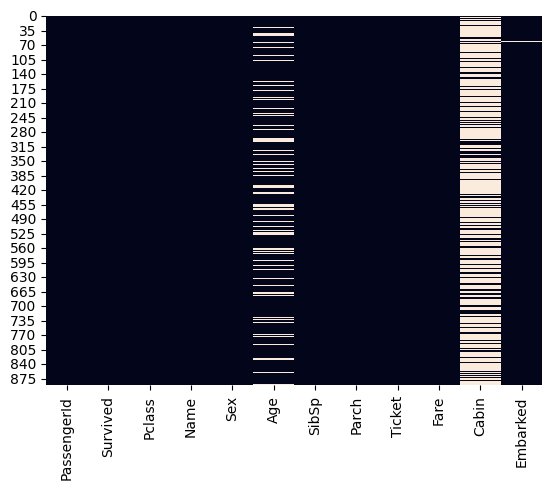

In [9]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

*Possible features affecting survival likelihood*

Likely affects
* Class (1st class is more likely to survive than 2nd and 3rd) Categorical
* Sex (Females are more likely to survive because of "Woman and children first" mentality) Categorical
* Wealth, Fare (Rich people are more likely to survive) Quantative
* Age (Younger people are stronger and faster) Quantative
* Cabin placement (Some cabins are placed in a way that makes it easier to survive) Categorical
* Sibling/Spouse count (People are more likely to stay on titanic for longer to ensure that their relatives are safe) Quantative
* Parents/Children count (same as siblings/spouse) Quantative

Likely don't affect
* Embarkation place
* Ticket type
* Name

In [10]:
quantative_data = data[['Survived', 'Fare', 'SibSp', 'Parch', 'Age']]
categorical_data = data[['Survived', 'Pclass', 'Sex','Embarked', 'Ticket', 'Cabin']]

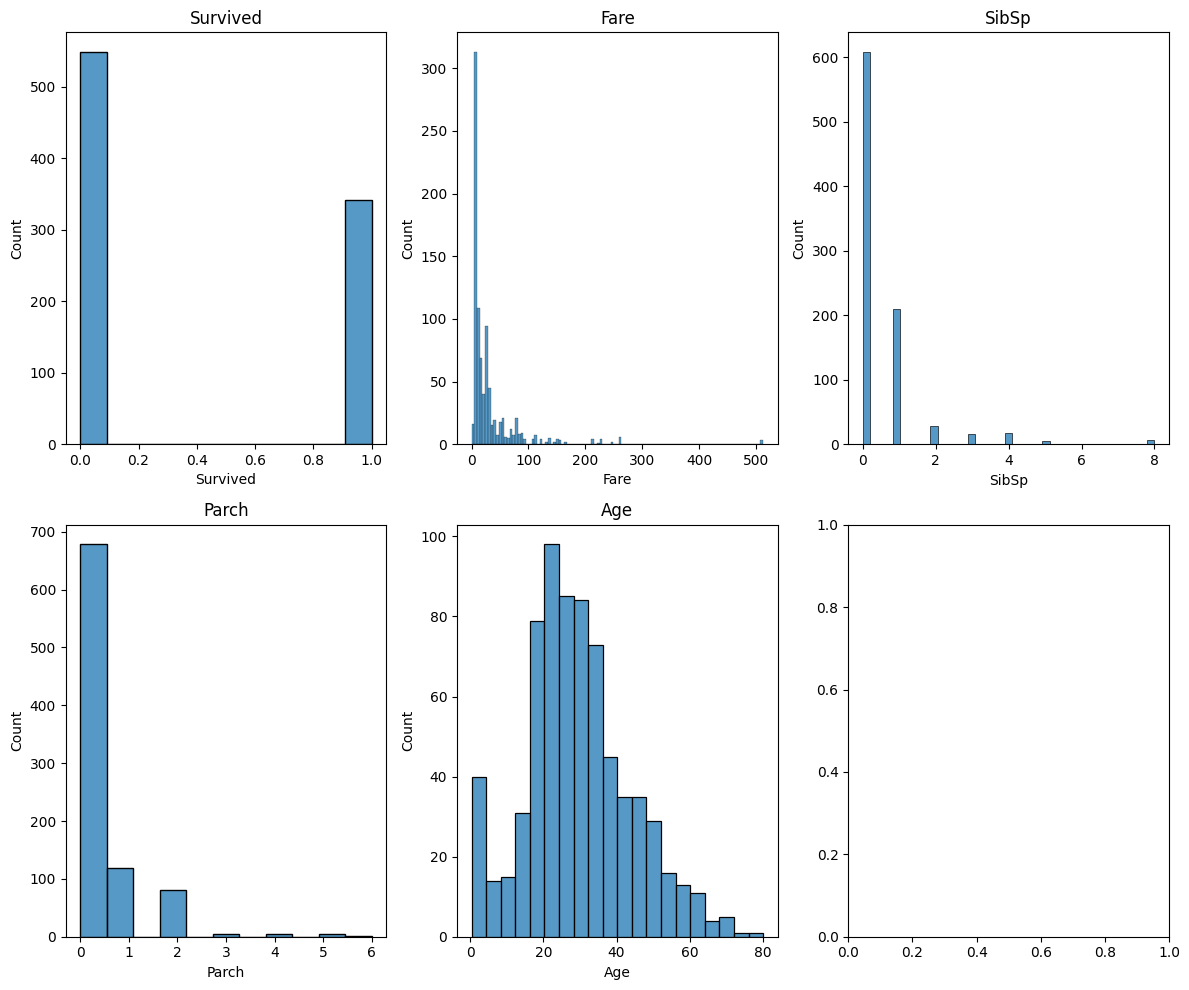

In [11]:
def plotQuant():
    fig, axes = plt.subplots(2, 3, figsize=(12, 10))
    axes = axes.flatten()

    for i, col in enumerate(quantative_data[1:]):
        sns.histplot(data=quantative_data, x=col, ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()

plotQuant()

Quantative features tend to spike in the begining.

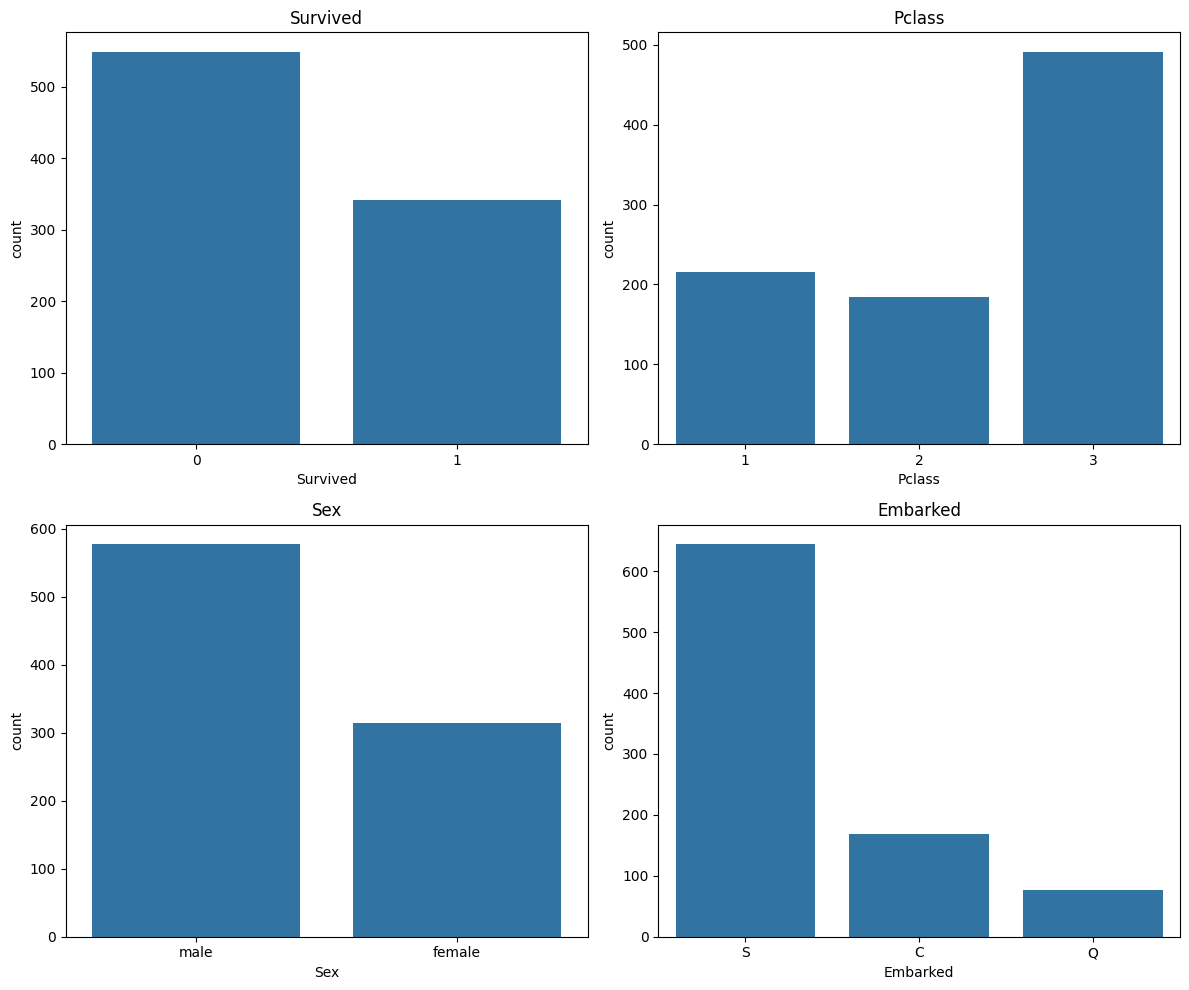

In [12]:
def plotCategorical():
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, col in enumerate(categorical_data.columns[:4]):
        # skipping 'Ticket' and 'Cabin' because they are cursed
        sns.countplot(data=categorical_data, x=col, ax=axes[i])
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

plotCategorical()

<Axes: >

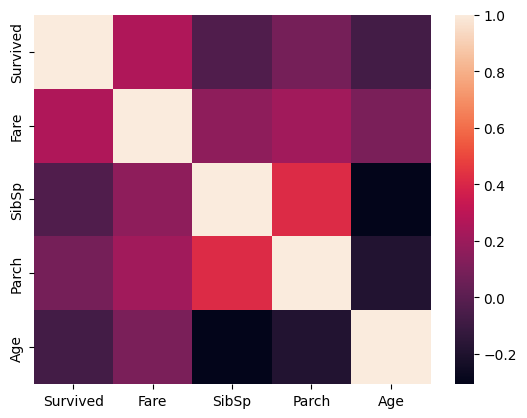

In [13]:
sns.heatmap(quantative_data.corr())

1. We have a big correlation between Parch and SibSp. Families tend to travel together.

2. We also have a negative correlation between age and SibSp, Parch.

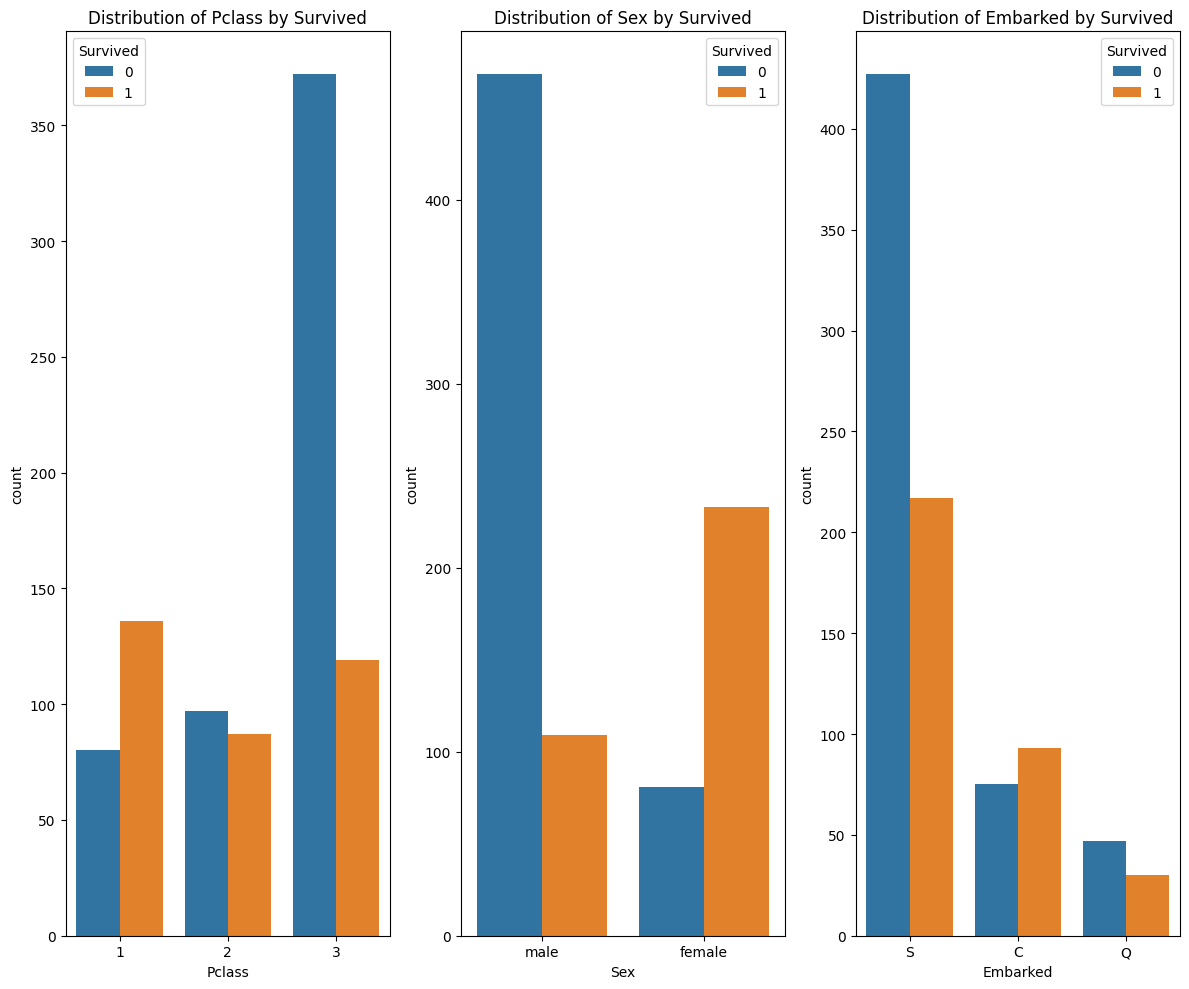

In [14]:
def plotCategoricalSurvival():
  fig, axes = plt.subplots(1, 3, figsize=(12, 10))
  axes = axes.flatten()
  for i, col in enumerate(['Pclass', 'Sex','Embarked']):
      sns.countplot(data=categorical_data,hue='Survived', x=col, ax=axes[i])
      axes[i].set_title(f'Distribution of {col} by Survived')

  plt.tight_layout()
  plt.show()
plotCategoricalSurvival()

## Points
* Passagers from the first class are more likely to survive than all other passagers. Passagers from the third class are more likely to die
* Females are more likely to survive than males.

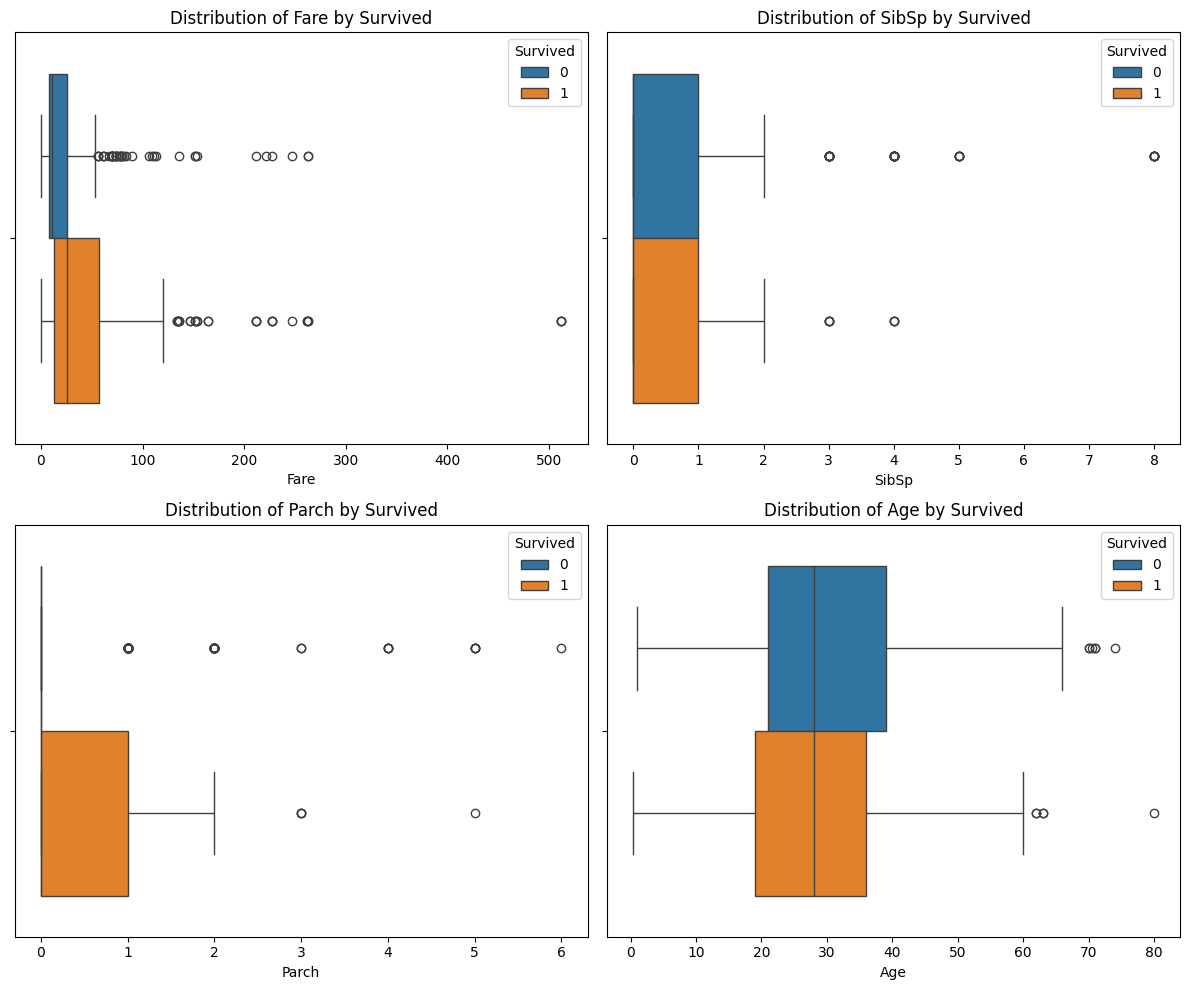

In [15]:
def plotQuantativeSurvival():
  fig, axes = plt.subplots(2, 2, figsize=(12, 10))
  axes = axes.flatten()
  for i, col in enumerate(['Fare', 'SibSp', 'Parch', 'Age']):
      sns.boxplot(data=quantative_data, hue='Survived', x=col, ax=axes[i])
      axes[i].set_title(f'Distribution of {col} by Survived')

  plt.tight_layout()
  plt.show()
plotQuantativeSurvival()

### Points
* Fare plays a crucial role.
* Anithing else probably is not relevant.

# Data cleaning

* Nan Age will be set to the mean of the sample.
* Nan Embarkment place will be droped.
* Nan Cabin will be set as its own category.

In [16]:
data.Age.fillna(data.Age.median(), inplace=True)
data.Fare = data.Fare.fillna(data.Fare.median())
data.dropna(subset=['Embarked'], inplace=True)
data.Cabin.fillna('Unknown', inplace=True)

<ipython-input-16-1b6594777d48>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(data.Age.median(), inplace=True)
<ipython-input-16-1b6594777d48>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

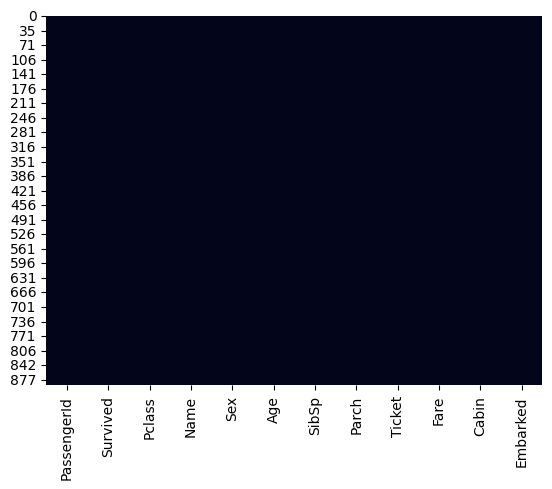

In [17]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

# Feature enginering

## Cabin

### Adding cabin letter
Adding cabin letter feature as it can affect cabin placement in the Titanic (also can be a wealth identificator)

In [18]:
data['Cabin_letter'] = data['Cabin'].apply(lambda x: str(x)[0])

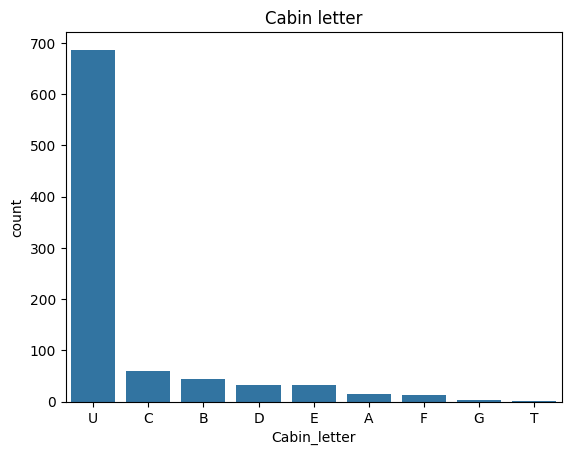

In [19]:
sns.barplot(x=data['Cabin_letter'].value_counts().index,
            y=data["Cabin_letter"].value_counts()).set_title('Cabin letter')
plt.show()

In [20]:
data.drop('Cabin', axis=1, inplace=True)

## Dummy variables

I won't drop the first dummy because i plan to utilise a tree classifier

In [21]:
data.Pclass = data.Pclass.astype(str)

In [22]:
all_dummies = pd.get_dummies(data[['Pclass', 'Sex', 'Embarked', 'Cabin_letter']])

In [23]:
data = pd.concat([data[['Survived', 'Fare', 'Age']], all_dummies], axis=1)
data

,Survived,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T,Cabin_letter_U
0,0,7.2500,22.0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True
1,1,71.2833,38.0,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
2,1,7.9250,26.0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,1,53.1000,35.0,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False
4,0,8.0500,35.0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,27.0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
887,1,30.0000,19.0,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False
888,0,23.4500,28.0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True
889,1,30.0000,26.0,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False


# Model building

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [120]:
data = pd.read_csv('train.csv')

In [121]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Cabin']

In [122]:
class FillMissingValues(BaseEstimator, TransformerMixin):
    def __init__(self, column, strategy='median', fill_value=None):
        self.column = column
        self.strategy = strategy
        self.fill_value = fill_value

    def fit(self, X, y=None):
        if self.strategy == 'median':
            self.fill_value = X[self.column].median()
        elif self.strategy == 'constant' and self.fill_value is None:
            raise ValueError("Specify 'fill_value' for constant strategy")
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].fillna(self.fill_value)
        return X

class ExtractCabinLetter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Cabin_letter'] = X['Cabin'].fillna('Unknown').apply(lambda x: str(x)[0])
        return X

class DropNA(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X.dropna(subset=self.columns, inplace=True)
        return X

class DropIrrelevant(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')


In [123]:
feature_pipeline = Pipeline([
    ('fill_age', FillMissingValues(column='Age', strategy='median')),
    ('fill_fare', FillMissingValues(column='Fare', strategy='median')),
    ('fill_embarked', FillMissingValues(column='Embarked', strategy='constant', fill_value='S')),
    ('extract_cabin_letter', ExtractCabinLetter()),
    ('drop_irrelevant', DropIrrelevant(columns_to_drop=['Name', 'Cabin', 'Ticket', 'SibSp', 'Parch'])),
    ('dummy_variables', ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['Pclass', 'Sex', 'Embarked', 'Cabin_letter']),], remainder='passthrough')),
])


In [95]:
y = data['Survived']
X = data.drop(['Survived'], axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
X_train_featured = feature_pipeline.fit_transform(X_train)
X_train_featured

array([[  1.    ,   0.    ,   0.    , ..., 332.    ,  45.5   ,  28.5   ],
       [  0.    ,   1.    ,   0.    , ..., 734.    ,  23.    ,  13.    ],
       [  0.    ,   0.    ,   1.    , ..., 383.    ,  32.    ,   7.925 ],
       ...,
       [  0.    ,   0.    ,   1.    , ..., 861.    ,  41.    ,  14.1083],
       [  1.    ,   0.    ,   0.    , ..., 436.    ,  14.    , 120.    ],
       [  1.    ,   0.    ,   0.    , ..., 103.    ,  21.    ,  77.2875]])

In [162]:
clf = RandomForestClassifier(random_state=42)

In [163]:
clf.fit(X_train_featured, y_train)

RandomForestClassifier(random_state=42)

In [164]:
y_pred = clf.predict(feature_pipeline.transform(X_test))

In [165]:
def show_metrics(y_test, y_pred):
  print(f'Accuracy: {accuracy_score(y_test, y_pred) : .3f}')
  print(f'Precision: {precision_score(y_test, y_pred) : .3f}')
  print(f'Recall: {recall_score(y_test, y_pred) : .3f}')
  print(f'F1: {f1_score(y_test, y_pred) : .3f}')

show_metrics(y_test, y_pred)

Accuracy:  0.821
Precision:  0.800
Recall:  0.757
F1:  0.778


Модель соответствует ожиданиям по всем метрикам (DecisionTreeClassifier, RandomForestClassifier)